<a href="https://colab.research.google.com/github/Boomcodes50/predictive-analytics/blob/main/Network_Security_Experiments_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import math

In [ ]:
data = pd.read_csv('merged_dataset.csv')

<ipython-input-2-53a78f1fa5b1>:1: DtypeWarning: Columns (1,3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('merged_dataset.csv')


Preprocessing

In [ ]:
data

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3.0,7.0,1.0,3.0,1.0,1.0,1.0,NaN,0.0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,NaN,0.0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12.0,8.0,1.0,2.0,2.0,1.0,1.0,NaN,0.0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6.0,9.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598284,59.166.0.9,24592,149.171.126.7,59452,tcp,FIN,0.032866,3806,52378,31,...,,10.0,5.0,6.0,3.0,1.0,1.0,2.0,NaN,0.0
1598285,59.166.0.0,7012,149.171.126.3,80,tcp,FIN,1.008843,1580,10168,31,...,,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,0.0
1598286,59.166.0.2,1437,149.171.126.7,53,udp,CON,0.001054,146,178,31,...,,2.0,1.0,6.0,4.0,1.0,1.0,1.0,NaN,0.0
1598287,175.45.176.2,8966,149.171.126.15,179,tcp,FIN,0.768112,26782,850,254,...,,8.0,7.0,1.0,2.0,1.0,1.0,7.0,Fuzzers,1.0


In [ ]:
data.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             700000 non-null  object 
 1   sport             700000 non-null  object 
 2   dstip             700000 non-null  object 
 3   dsport            700000 non-null  object 
 4   proto             700000 non-null  object 
 5   state             700000 non-null  object 
 6   dur               700000 non-null  float64
 7   sbytes            700000 non-null  int64  
 8   dbytes            700000 non-null  int64  
 9   sttl              700000 non-null  int64  
 10  dttl              700000 non-null  int64  
 11  sloss             700000 non-null  int64  
 12  dloss             700000 non-null  int64  
 13  service           700000 non-null  object 
 14  Sload             700000 non-null  float64
 15  Dload             700000 non-null  float64
 16  Spkts             70

In [ ]:
data['attack_cat'].unique()

array(['normal', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', ' Fuzzers', 'Worms', 'Backdoors', 'Analysis'],
      dtype=object)

In [ ]:
data.loc[:, 'srcip']

0         59.166.0.0
1         59.166.0.6
2         59.166.0.5
3         59.166.0.3
4         59.166.0.0
             ...    
699995    59.166.0.8
699996    59.166.0.0
699997    59.166.0.0
699998    59.166.0.6
699999    59.166.0.0
Name: srcip, Length: 700000, dtype: object

In [ ]:
data['attack_cat'].fillna('normal', inplace=True)

In [ ]:
data.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

In [ ]:
data['service'].isnull().sum()

0

In [ ]:
data['service']

0            -
1          dns
2          dns
3          dns
4            -
          ... 
699995       -
699996    http
699997       -
699998       -
699999       -
Name: service, Length: 700000, dtype: object

In [ ]:
data['service'].replace('-', 'others', inplace=True)

In [ ]:
data['state']

0         CON
1         CON
2         CON
3         CON
4         CON
         ... 
699995    FIN
699996    FIN
699997    FIN
699998    CON
699999    FIN
Name: state, Length: 700000, dtype: object

In [ ]:
data['service']

0         others
1            dns
2            dns
3            dns
4         others
           ...  
699995    others
699996      http
699997    others
699998    others
699999    others
Name: service, Length: 700000, dtype: object

In [ ]:
data['dsport'].value_counts()

dsport
53       107483
80        61279
5190      33429
53        29813
6881      28222
          ...  
22341         1
36420         1
35534         1
2706          1
57317         1
Name: count, Length: 87819, dtype: int64

In [ ]:
data['dsport'].replace('0xc0a8', 53, inplace=True)
# data['service'].replace('-', 'others', inplace=True)

In [ ]:
data.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

In [ ]:
data['dsport'].unique()

array(['1024', '53', '111', ..., 29112, 30186, 59241], dtype=object)

In [ ]:
dsport_only = {
    'dsport': data['dsport'].unique()
}

dsport_only_frame = pd.DataFrame(dsport_only)

In [ ]:
dsport_only_frame

,dsport
0,1024
1,53
2,111
3,0
4,41049
...,...
87813,20416
87814,29289
87815,29112
87816,30186


In [ ]:
# dsport_csv = dsport_only_frame.to_csv('dsport_only.csv')

In [ ]:
sport_only = {
    'dsport': data['sport'].unique()
}

sport_only_frame = pd.DataFrame(sport_only)

In [ ]:
# sport_csv = sport_only_frame.to_csv('sport_only.csv')

In [ ]:
cat_columns = ['srcip', 'dstip', 'sport', 'dsport', 'proto', 'state']

for i in cat_columns:
  if i == 'srcip':
    data[i].replace('-', '59.166.0.2', inplace=True)
  if i == 'dstip':
    data[i].replace('-', '149.171.126.4', inplace=True)
  if i == 'sport':
    # if isinstance(data[i], str):
    data[i].replace('-', 0, inplace=True)
    data[i].replace('0x000c', 0, inplace=True)
    data[i].replace('0x000b', 0, inplace=True)
    data[i].replace('0x20205321', 0, inplace=True)
  if i == 'dsport':
    # if isinstance(i, str):
    data[i].replace('-', 53, inplace=True)
    data[i].replace('0x000c', 0, inplace=True)
    data[i].replace('0x000b', 0, inplace=True)
    data[i].replace('0x20205321', 0, inplace=True)
  if i == 'proto':
    data[i].replace('-', 'tcp', inplace=True)
  if i == 'state':
    data[i].replace('-', 'FIN', inplace=True)

In [ ]:
data['is_sm_ips_ports'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 700000 entries, 0 to 699999
Series name: is_sm_ips_ports
Non-Null Count   Dtype
--------------   -----
700000 non-null  int64
dtypes: int64(1)
memory usage: 5.3 MB


In [ ]:
data['is_sm_ips_ports'].unique()

array([0, 1])

In [ ]:
data['ct_ftp_cmd']

0         0
1         0
2         0
3         0
4         0
         ..
699995    0
699996    0
699997    0
699998    0
699999    0
Name: ct_ftp_cmd, Length: 700000, dtype: int64

In [ ]:
data['state'].replace('-', 'others', inplace=True)

In [ ]:
data['srcip'].value_counts()

srcip
59.166.0.2         67209
59.166.0.0         67127
59.166.0.5         67091
59.166.0.4         66722
59.166.0.1         66587
59.166.0.3         66145
59.166.0.6         64689
59.166.0.8         64640
59.166.0.9         64187
59.166.0.7         63725
175.45.176.1       14325
149.171.126.18      6010
175.45.176.3        5128
175.45.176.0        4782
175.45.176.2        3236
10.40.85.1          1680
10.40.182.1         1670
10.40.85.30          888
10.40.170.2          874
10.40.182.3          874
149.171.126.1        251
149.171.126.5        249
149.171.126.6        241
149.171.126.2        232
149.171.126.3        231
149.171.126.4        225
149.171.126.9        217
149.171.126.8        217
149.171.126.7        207
149.171.126.0        192
192.168.241.243      108
149.171.126.11        16
149.171.126.15         8
149.171.126.16         6
149.171.126.10         3
149.171.126.19         3
149.171.126.12         2
149.171.126.17         1
149.171.126.13         1
127.0.0.1          

In [ ]:
data['dstip'].value_counts()

dstip
149.171.126.4      67331
149.171.126.1      66973
149.171.126.0      66925
149.171.126.5      66723
149.171.126.3      66697
149.171.126.2      66674
149.171.126.9      65187
149.171.126.7      64057
149.171.126.6      63951
149.171.126.8      63604
149.171.126.18      8213
175.45.176.1        5965
149.171.126.12      4815
149.171.126.13      2113
149.171.126.17      2109
149.171.126.10      1975
149.171.126.14      1955
224.0.0.5           1912
149.171.126.11      1796
149.171.126.15      1631
10.40.182.3         1582
149.171.126.19      1449
149.171.126.16      1400
10.40.85.1           888
10.40.170.2          874
10.40.85.30          718
59.166.0.1           273
59.166.0.2           253
59.166.0.0           241
59.166.0.9           233
59.166.0.4           218
59.166.0.8           215
59.166.0.5           214
59.166.0.6           211
59.166.0.7           203
59.166.0.3           201
192.168.241.243      108
175.45.176.0          70
224.0.0.1             14
175.45.176.3       

In [ ]:
data['sport'].value_counts()

sport
0        6065
47439    4689
1043     4033
0        3611
47439    2243
         ... 
28469       1
37391       1
24055       1
54368       1
10142       1
Name: count, Length: 100269, dtype: int64

In [ ]:
data['dsport'].value_counts()

dsport
53       107544
80        61279
5190      33429
53        29813
6881      28222
          ...  
35534         1
2706          1
57317         1
5467          1
52099         1
Name: count, Length: 87816, dtype: int64

In [ ]:
data['proto'].value_counts()

proto
tcp     494737
udp     195478
arp       4062
ospf      2116
unas      1442
         ...  
irtp        14
sdrp        14
udt          4
esp          2
rtp          1
Name: count, Length: 135, dtype: int64

In [ ]:
data['state'].value_counts()

state
FIN    487911
CON    187504
INT     21799
REQ      2429
CLO       111
URH       108
RST        74
ECO        26
ACC        22
PAR         4
URN         2
TXD         2
no          2
MAS         2
TST         2
ECR         2
Name: count, dtype: int64

In [ ]:
data['service'].value_counts()

service
others      430656
dns         121169
http         55858
ftp-data     37305
smtp         23588
ftp          16531
ssh          14636
pop3           206
ssl             20
snmp            14
radius           7
dhcp             7
irc              3
Name: count, dtype: int64

In [ ]:
hello = '0x000c'

# type(hello) == str

isinstance(hello, str)

True

In [ ]:
data['state'].empty

False

In [ ]:
data.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

In [ ]:
data['ct_dst_src_ltm']

0         2
1         1
2         1
3         1
4         2
         ..
699995    4
699996    2
699997    2
699998    3
699999    2
Name: ct_dst_src_ltm, Length: 700000, dtype: int64

In [ ]:
data

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,normal,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,normal,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,normal,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,normal,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,59.166.0.8,12520,149.171.126.6,31010,tcp,FIN,0.020383,320,1874,31,...,0,8,20,7,5,1,1,4,normal,0
699996,59.166.0.0,18895,149.171.126.9,80,tcp,FIN,1.402957,19410,1087890,31,...,0,1,1,2,7,2,2,2,normal,0
699997,59.166.0.0,30103,149.171.126.5,5190,tcp,FIN,0.007108,2158,2464,31,...,0,13,13,6,7,2,1,2,normal,0
699998,59.166.0.6,30388,149.171.126.5,111,udp,CON,0.004435,568,304,31,...,0,10,13,6,5,1,1,3,normal,0


In [ ]:
data.loc[:, 'Label'].value_counts()

Label
0    677785
1     22215
Name: count, dtype: int64

In [ ]:
data.drop(['attack_cat'], axis=1, inplace=True)

In [ ]:
# data

In [ ]:
len(data.columns)

49

In [ ]:
len(data.columns)

48

In [ ]:
data['Label']

0         0
1         0
2         0
3         0
4         0
         ..
699995    0
699996    0
699997    0
699998    0
699999    0
Name: Label, Length: 700000, dtype: int64

In [ ]:
len(data.columns)

49

In [ ]:
attack_cat_index = data.columns.get_loc("attack_cat")
print("Index number of 'attack_cat' column:", attack_cat_index)


Index number of 'attack_cat' column: 47


In [ ]:
X = data.iloc[:, 0:47].values
y = data.iloc[:, -1].values

In [ ]:
X.shape

(700000, 47)

In [ ]:
y.shape

(700000,)

In [ ]:
X[:, 4:5]

array([['udp'],
       ['udp'],
       ['udp'],
       ...,
       ['tcp'],
       ['udp'],
       ['tcp']], dtype=object)

In [ ]:
X[:, 5:6]

array([['CON'],
       ['CON'],
       ['CON'],
       ...,
       ['FIN'],
       ['CON'],
       ['FIN']], dtype=object)

In [ ]:
unique_values = data.iloc[:, 47.unique()
print("Unique values of column at index 47:", unique_values)


Unique values of column at index 48: [0 1]


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# Encode the "proto" column
X[:, 4:5] = np.array(encoder.fit_transform(X[:, 4:5]))
X[:, 5:6] = np.array(encoder.fit_transform(X[:, 5:6]))
X[:, 13:14] = np.array(encoder.fit_transform(X[:, 13:14]))
# X[:, 47] = np.array(encoder.fit_transform(X[:, 47]))
X[:, -1:] = np.array(encoder.fit_transform(X[:, -1:]))  # For the last column

In [ ]:
# Assuming X is your encoded array and index 47 corresponds to the last column
new_values_index_47 = X[:, -1]  # Selecting the last column of X
print("New values of column at index 47:", new_values_index_47)


New values of column at index 47: [1.0 0.0 0.0 ... 1.0 2.0 1.0]


In [ ]:
import numpy as np

# Assuming X is your encoded array and index -1 corresponds to the last column
unique_values_index_minus_1 = np.unique(X[:, -1])
print("Unique values of column at index -1:", unique_values_index_minus_1)


Unique values of column at index -1: [0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0
 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0
 30.0 31.0 32.0]


In [ ]:
len(X[:, 4:5])

700000

In [ ]:
X[:, 13:14]

array([[6.0],
       [1.0],
       [1.0],
       ...,
       [6.0],
       [6.0],
       [6.0]], dtype=object)

In [ ]:
X[:, -1]

array([1.0, 0.0, 0.0, ..., 1.0, 2.0, 1.0], dtype=object)

In [ ]:
X.shape

(700000, 47)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X.shape

(700000, 129)

In [ ]:
len(X[:,0])

700000

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(560000, 129)

In [ ]:
X.shape

(700000, 129)

In [ ]:
# X_train_scaled = X_train
# X_test_scaled = X_test

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled[:, :-6] = scaler.fit_transform(X_train_scaled[:, :-6])
# X_test_scaled[:, :-6] = scaler.transform(X_test_scaled[:, :-6])

In [ ]:
# np.isnan(X)

In [ ]:
# len(null_count)

In [ ]:
# for i in y_train:
#   if np.isnan(i):
#     i = 0.0

In [ ]:
# null_count = []

# for i in y_train:
#   if np.isnan(i):
#     null_count.append(i)

In [ ]:
# len(null_count)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)



Accuracy: 0.9669857142857143


In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[134225   1419]
 [  3203   1153]]


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred_nb)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    135644
           1       0.45      0.26      0.33      4356

    accuracy                           0.97    140000
   macro avg       0.71      0.63      0.66    140000
weighted avg       0.96      0.97      0.96    140000



In [ ]:
from sklearn.metrics import f1_score

# Compute F1-score
f1 = f1_score(y_test, y_pred_nb)
print("F1-Score:", f1)


F1-Score: 0.3328521939953811


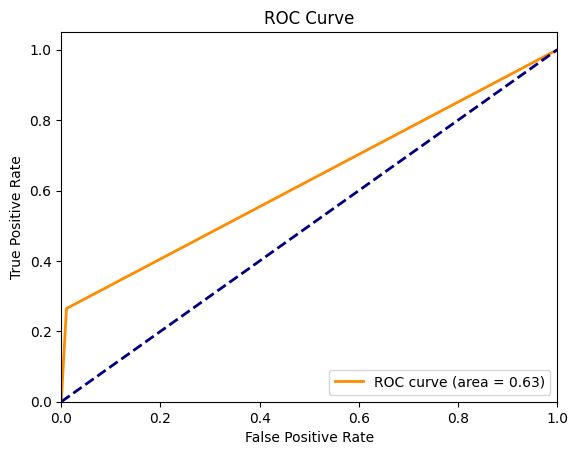

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


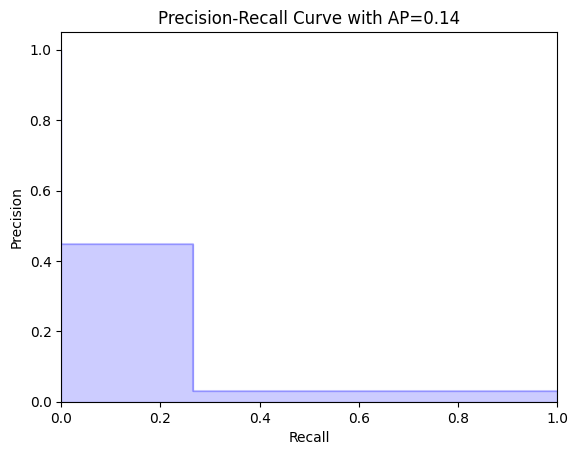

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_nb)

# Compute Average Precision (AP)
average_precision = average_precision_score(y_test, y_pred_nb)

# Plot Precision-Recall curve with AP
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve with AP={0:0.2f}'.format(average_precision))
plt.show()


In [ ]:
len(data.columns)

48

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('merged_dataset.csv')

<ipython-input-158-53a78f1fa5b1>:1: DtypeWarning: Columns (1,3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('merged_dataset.csv')


In [ ]:
data

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
2540043,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
2540044,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Create an empty list to store columns with alphanumeric or special characters
columns_with_strings = []

# Iterate over each column
for column in data.columns:
    # Check if any element in the column contains alphanumeric or special characters
    if data[column].apply(lambda x: isinstance(x, str) and any(char.isalnum() or not char.isspace() for char in x)).any():
        columns_with_strings.append(column)

# Print columns with alphanumeric or special characters
print("Columns with alphanumeric or special characters:")
for column in columns_with_strings:
    print(column)


Columns with alphanumeric or special characters:
srcip
sport
dstip
dsport
proto
state
service
ct_ftp_cmd
attack_cat


In [ ]:
# Assuming 'data' is your DataFrame

# Iterate over each column
for column in ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd', 'attack_cat']:
    # Print the column name
    print("Unique values in column '{}':".format(column))
    # Remove leading and trailing whitespaces and then print the unique values in the column
    print(data[column].str.strip().unique())
    print()  # Add an empty line for better readability


Unique values in column 'srcip':
['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.2' '149.171.126.11' '149.171.126.4'
 '149.171.126.5' '149.171.126.17' '149.171.126.19' '149.171.126.9'
 '149.171.126.8' '149.171.126.7' '149.171.126.15' '149.171.126.6'
 '149.171.126.0' '149.171.126.1' '149.171.126.3' '149.171.126.13'
 '149.171.126.12' '149.171.126.10' '149.171.126.18' '127.0.0.1'
 '149.171.126.14' '10.40.85.10' '10.40.182.6']

Unique values in column 'sport':
[nan '30597' '56866' ... '47629' '13366' '27282']

Unique values in column 'dstip':
['149.171.126.6' '149.171.126.9' '149.171.126.7' '149.171.126.5'
 '149.171.126.0' '149.171.126.4' '10.40.182.3' '10.40.170.2'
 '149.171.126.18' '149.171.126.16' '149.171.126.8' '149.171.126.2

In [ ]:
non_numeric_dsport = data[~data['dsport'].astype(str).str.isdigit()]['dsport'].unique()
print(non_numeric_dsport)


['0xc0a8' '-' '0x20205321' '0xcc09']


In [ ]:
non_numeric_dsport = data[~data['sport'].astype(str).str.isdigit()]['sport'].unique()
print(non_numeric_dsport)


['0x000b' '0x000c' '-']


In [ ]:
data['attack_cat'].fillna('normal', inplace=True)


In [ ]:
non_alpha_attack_cat = data[~data['attack_cat'].str.strip().str.isalpha()]['attack_cat'].unique()
print(non_alpha_attack_cat)


[]


In [ ]:
data['attack_cat'].value_counts()

attack_cat
normal              2218764
Generic              215481
Exploits              44525
 Fuzzers              19195
DoS                   16353
 Reconnaissance       12228
 Fuzzers               5051
Analysis               2677
Backdoor               1795
Reconnaissance         1759
 Shellcode             1288
Backdoors               534
Shellcode               223
Worms                   174
Name: count, dtype: int64

In [ ]:
data['state'].replace('-', 'Fin', inplace=True)

In [ ]:
data['service'].replace('-', 'others', inplace=True)

In [ ]:
data['dsport'].replace('0xc0a8', 53, inplace=True)
data['dsport'].replace('0xcc09', 53, inplace=True)
data['dsport'].replace('0x20205321', 53, inplace=True)
data['dsport'].replace('-', 53, inplace=True)

In [ ]:
data['sport'].replace('0x000c', 0, inplace=True)
data['sport'].replace('0x20205321', 0, inplace=True)
data['sport'].replace('0x000b', 0, inplace=True)
data['sport'].replace('-', 0, inplace=True)

In [ ]:
data['proto'].replace('-', 'tcp', inplace=True)

In [ ]:
data['dstip'].replace('-', '149.171.126.4', inplace=True)

In [ ]:
data['srcip'].replace('-', '59.166.0.2', inplace=True)

In [ ]:
# Replace NaN values with 0 in the 'ct_flw_http_mthd' and 'is_ftp_login' columns
data['ct_flw_http_mthd'].fillna(0, inplace=True)
data['is_ftp_login'].fillna(0, inplace=True)

In [ ]:
# Check for NaN values in the "attack_cat" column
data['attack_cat'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
2540042    False
2540043    False
2540044    False
2540045    False
2540046    False
Name: attack_cat, Length: 2540047, dtype: bool

In [ ]:
data['attack_cat'].value_counts()

attack_cat
normal              2218764
Generic              215481
Exploits              44525
 Fuzzers              19195
DoS                   16353
 Reconnaissance       12228
 Fuzzers               5051
Analysis               2677
Backdoor               1795
Reconnaissance         1759
 Shellcode             1288
Backdoors               534
Shellcode               223
Worms                   174
Name: count, dtype: int64

In [ ]:
data['sport']

0           1390
1          33661
2           1464
3           3593
4          49664
           ...  
2540042    33094
2540043    20848
2540044    21511
2540045    35433
2540046    17293
Name: sport, Length: 2540047, dtype: object

In [ ]:
# Check if '0x20205321' exists in the 'sport' column
is_value_present = '0x20205321' in data['sport'].values

# Print the result
print("Is '0x20205321' present in the 'sport' column:", is_value_present)


Is '0x20205321' present in the 'sport' column: False


In [ ]:
# Check for NaN values in the entire DataFrame
has_nan = data.isnull().values.any()

# Print whether NaN values are present in the DataFrame
print("Are there NaN values in the DataFrame:", has_nan)

# Check which columns have NaN values
columns_with_nan = data.columns[data.isnull().any()]

# Print the columns with NaN values
print("Columns with NaN values:", columns_with_nan)

# Count NaN values in each column
nan_counts = data[columns_with_nan].isnull().sum()

# Print the count of NaN values in each column
print("Count of NaN values in each column:")
print(nan_counts)


Are there NaN values in the DataFrame: False
Columns with NaN values: Index([], dtype='object')
Count of NaN values in each column:
Series([], dtype: float64)


In [ ]:
data['Label'].value_counts()

Label
0    2218764
1     321283
Name: count, dtype: int64

In [ ]:
# # Get the value counts of the "attack_cat" column
# attack_cat_value_counts = data['service'].value_counts()

# # Convert the value counts Series to a DataFrame
# attack_cat_value_counts_df = pd.DataFrame(attack_cat_value_counts)

# # Reset the index to make the "attack_cat" values a column
# attack_cat_value_counts_df.reset_index(inplace=True)

# # Rename the columns for clarity
# attack_cat_value_counts_df.columns = ['service', 'Frequency']

# # Save the DataFrame to a CSV file
# attack_cat_value_counts_df.to_csv('service_value_counts.csv', index=False)

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Create an empty list to store columns with alphanumeric or special characters
columns_with_strings = []

# Iterate over each column
for column in data.columns:
    # Check if any element in the column contains alphanumeric or special characters
    if data[column].apply(lambda x: isinstance(x, str) and any(char.isalnum() or not char.isspace() for char in x)).any():
        columns_with_strings.append(column)

# Print columns with alphanumeric or special characters
print("Columns with alphanumeric or special characters:")
for column in columns_with_strings:
    print(column)


Columns with alphanumeric or special characters:
srcip
sport
dstip
dsport
proto
state
service
ct_ftp_cmd
attack_cat


In [ ]:
# Assuming 'data' is your DataFrame

# Iterate over each column
for column in ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd', 'attack_cat']:
    # Print the column name
    print("Unique values in column '{}':".format(column))
    # Print the unique values in the column
    print(data[column].unique())
    print()  # Add an empty line for better readability


Unique values in column 'srcip':
['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.2' '149.171.126.11' '149.171.126.4'
 '149.171.126.5' '149.171.126.17' '149.171.126.19' '149.171.126.9'
 '149.171.126.8' '149.171.126.7' '149.171.126.15' '149.171.126.6'
 '149.171.126.0' '149.171.126.1' '149.171.126.3' '149.171.126.13'
 '149.171.126.12' '149.171.126.10' '149.171.126.18' '127.0.0.1'
 '149.171.126.14' '10.40.85.10' '10.40.182.6']

Unique values in column 'sport':
[1390 33661 1464 ... 533 933 706]

Unique values in column 'dstip':
['149.171.126.6' '149.171.126.9' '149.171.126.7' '149.171.126.5'
 '149.171.126.0' '149.171.126.4' '10.40.182.3' '10.40.170.2'
 '149.171.126.18' '149.171.126.16' '149.171.126.8' '149.171.126.2'
 '149.171.126.

In [ ]:
import re

# Define a regular expression pattern to match IP addresses
ip_pattern = r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b'

# Compile the regular expression pattern
ip_regex = re.compile(ip_pattern)

# Function to check if a string is an IP address
def is_ip_address(string):
    return bool(ip_regex.match(string))

# Filter strings in the 'dstip' column that are not IP addresses
non_ip_addresses = [s for s in data['dstip'].unique() if not is_ip_address(s)]

# Print the strings that do not match the IP address format
print("Non-IP addresses:")
print(non_ip_addresses)


Non-IP addresses:
[]


In [ ]:
non_numeric_dsport = data[~data['dsport'].astype(str).str.isdigit()]['dsport'].unique()
print(non_numeric_dsport)


[]


In [ ]:
data.to_csv('cleaned_merged.csv')

In [ ]:
df = data.copy

In [ ]:
# Drop the "attack_cat" column
data.drop(columns=['attack_cat'], inplace=True)


In [ ]:
data['Label'].unique()

array([0, 1])

In [ ]:
# data['attack_cat'].unique()

In [ ]:
len(data.columns)

48

In [ ]:
X = data.iloc[:, 0:47].values
y = data.iloc[:, -1].values

In [ ]:
X.shape

(2540047, 47)

In [ ]:
y.shape

(2540047,)

In [ ]:
X[:, 4:5]

array([['udp'],
       ['udp'],
       ['udp'],
       ...,
       ['tcp'],
       ['tcp'],
       ['tcp']], dtype=object)

In [ ]:
X[:, 5:6]

array([['CON'],
       ['CON'],
       ['CON'],
       ...,
       ['CON'],
       ['CON'],
       ['CON']], dtype=object)

In [ ]:
X[:, 13:14]

array([['dns'],
       ['others'],
       ['dns'],
       ...,
       ['ftp'],
       ['http'],
       ['pop3']], dtype=object)

In [ ]:
# data['attack_cat']

In [ ]:
# X[:, 44:45]

In [ ]:
X.shape[1]

47

In [ ]:
# # Get the number of columns in array X
# num_columns_X = X.shape[1]

# # Print the column names of X
# print("Columns of X:")
# for i in range(num_columns_X):
#     print(f"Column {i+1}")


In [ ]:
X[:, 46]

array([1, 2, 1, ..., 2, 2, 2], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# Encode the "proto" column
X[:, 4:5] = np.array(encoder.fit_transform(X[:, 4:5]))
X[:, 5:6] = np.array(encoder.fit_transform(X[:, 5:6]))
X[:, 13:14] = np.array(encoder.fit_transform(X[:, 13:14]))
# X[:, 47] = np.array(encoder.fit_transform(X[:, 47]))
# X[:, -1:] = np.array(encoder.fit_transform(X[:, -1:]))  # For the last column

In [ ]:
X[:, 46]

array([1, 2, 1, ..., 2, 2, 2], dtype=object)

In [ ]:
X.shape

(2540047, 47)

In [ ]:
X[:, 13:14]

array([[1.0],
       [6.0],
       [1.0],
       ...,
       [2.0],
       [4.0],
       [7.0]], dtype=object)

In [ ]:
X[:, 4:5]

array([[120.0],
       [120.0],
       [120.0],
       ...,
       [114.0],
       [114.0],
       [114.0]], dtype=object)

In [ ]:
X[:, 5:6]

array([[2.0],
       [2.0],
       [2.0],
       ...,
       [2.0],
       [2.0],
       [2.0]], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X.shape

(2540047, 135)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(2032037, 135)

In [ ]:
print("Shape of X:", X.shape)
print("Data type of X:", X.dtype)


Shape of X: (2540047, 135)
Data type of X: object


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

ValueError: could not convert string to float: ' '